In [1]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../')
sys.path.insert(0, build_dir)

import pandas as pd
import numpy as np

import sorters
from data import list_generators

In [2]:
sorts = sorters.list_sorters()
print(sorts)

['adaptive_shivers_sort', 'cartesian_tree_sort', 'counting_sort', 'heap_sort', 'insertion_sort', 'mel_sort', 'merge_sort', 'poplar_sort', 'quick_sort', 'quick_merge_sort', 'ska_sort', 'slab_sort', 'smooth_sort', 'spin_sort', 'splay_sort', 'spread_sort', 'std_sort', 'tim_sort']


In [3]:
import data.list_generators as lg

sizes = []
for i in range (10, 100000, 10000):
    sizes.append(i)

print(sizes)

[10, 10010, 20010, 30010, 40010, 50010, 60010, 70010, 80010, 90010]


In [4]:
dataset = []
for size in sizes:
    dataset.append(lg.randomize_list(lg.generate_list(size)))

In [5]:
from tqdm import tqdm

times = []
for sort in tqdm(sorts, desc="Sorters"):
    sort_time = []
    for arr in tqdm(dataset, desc=f"Benchmarking {sort}", leave=False):
        sort_time.append(sorters.benchmark_sorter(sort, arr))
    times.append(sort_time)

print(times)

Sorters: 100%|██████████| 18/18 [00:02<00:00,  7.14it/s]

[[0.009458, 0.4695, 0.944375, 1.522083, 1.993708, 2.5765, 3.206, 4.066292, 4.221958, 4.79175], [0.000959, 0.507833, 1.086167, 1.814583, 2.5505, 3.405583, 4.114125, 4.690667, 5.681084, 6.786958], [0.000375, 0.01975, 0.04225, 0.059833, 0.09275, 0.121375, 0.100125, 0.116792, 0.185791, 0.209708], [0.015541, 0.256209, 0.535042, 0.824208, 1.156875, 1.564834, 1.878458, 2.087916, 2.574459, 3.036833], [0.000292, 6.645084, 26.775875, 60.328125, 106.775417, 169.342083, 248.446625, 333.539041, 436.251667, 549.009333], [0.00425, 0.499, 1.170541, 2.164875, 2.679167, 4.428375, 4.553, 4.975625, 7.601708, 7.451583], [0.0005, 0.405917, 0.651292, 0.950833, 1.37725, 1.804208, 2.243584, 2.600667, 2.774, 3.279417], [0.003958, 0.38275, 0.825917, 1.346959, 1.893375, 2.519625, 3.737458, 3.76075, 4.501417, 5.721458], [0.014958, 0.311083, 0.652833, 1.025084, 1.505791, 1.951459, 2.365167, 2.707625, 3.049042, 3.653208], [0.000458, 0.337083, 0.692542, 1.149334, 1.600208, 2.313417, 2.386292, 2.980667, 3.452833, 3.97

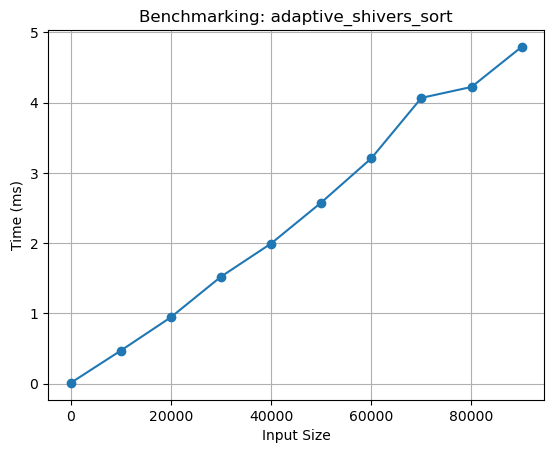

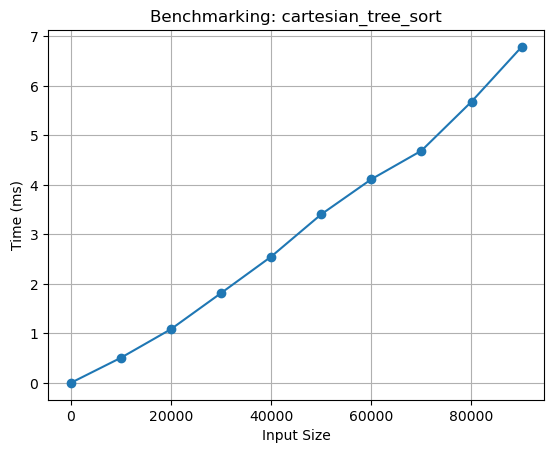

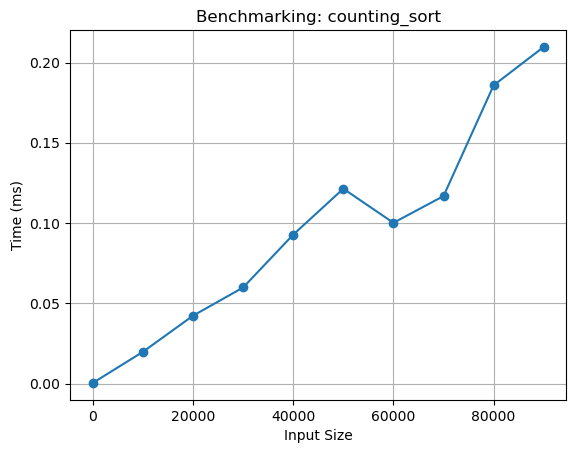

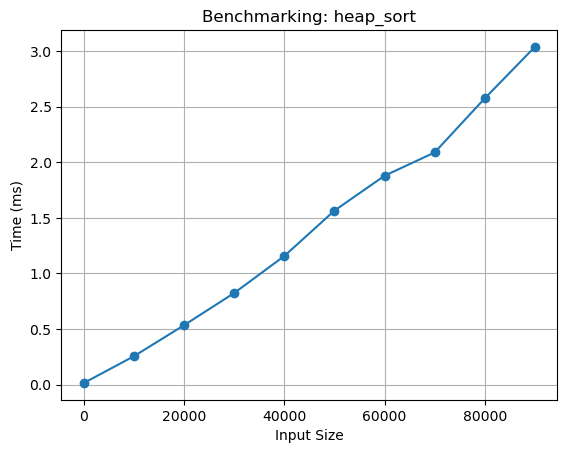

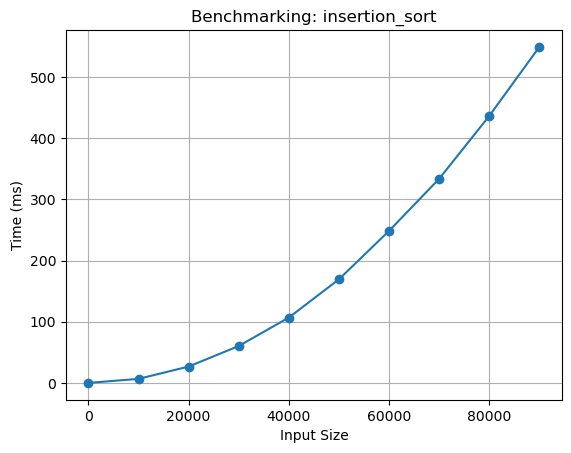

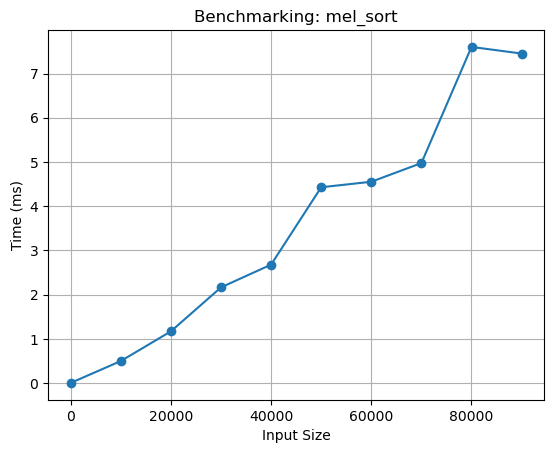

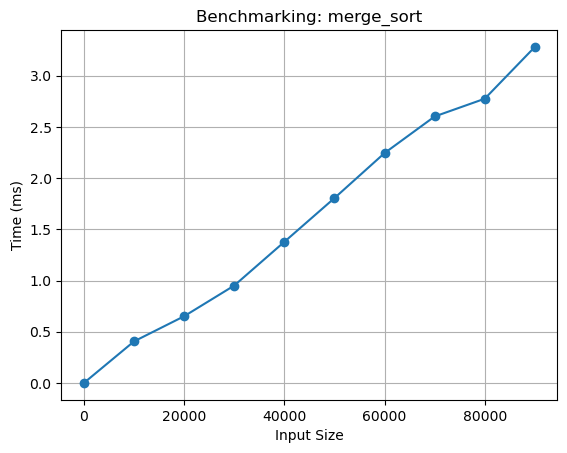

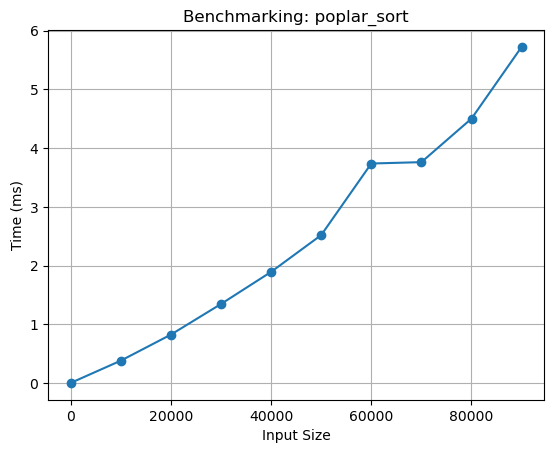

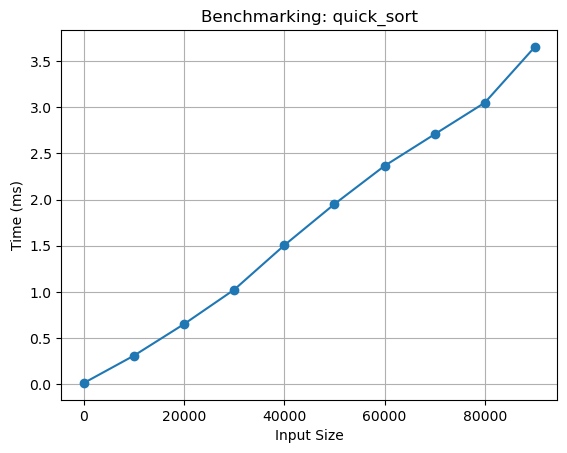

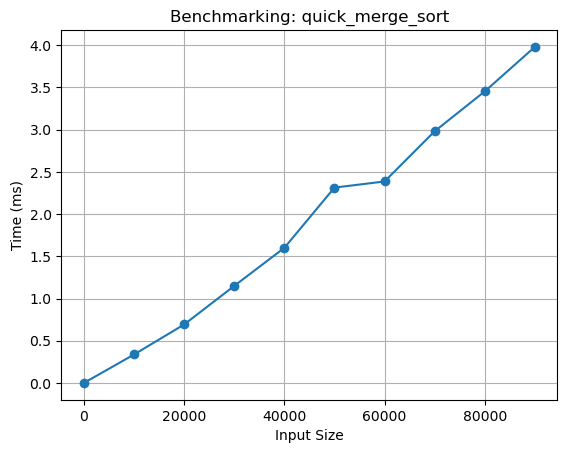

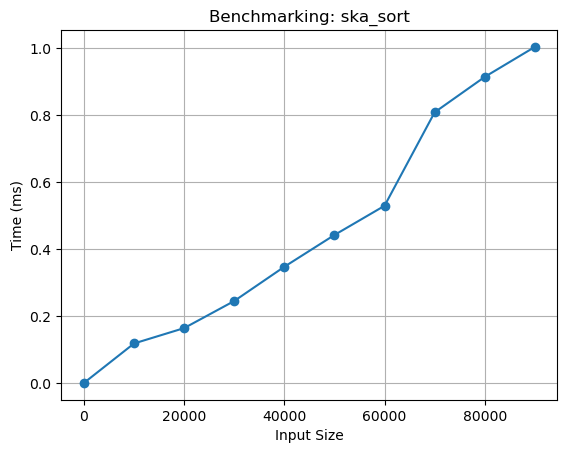

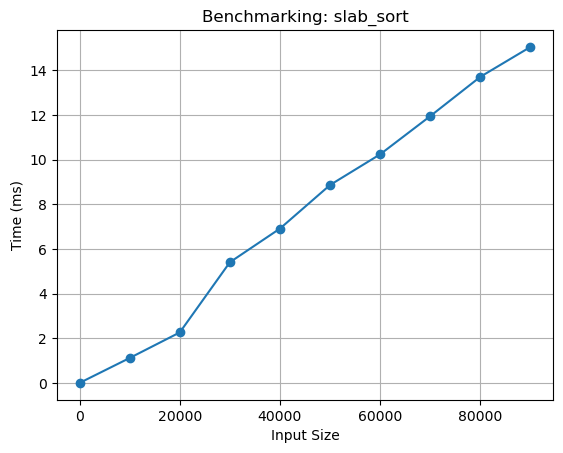

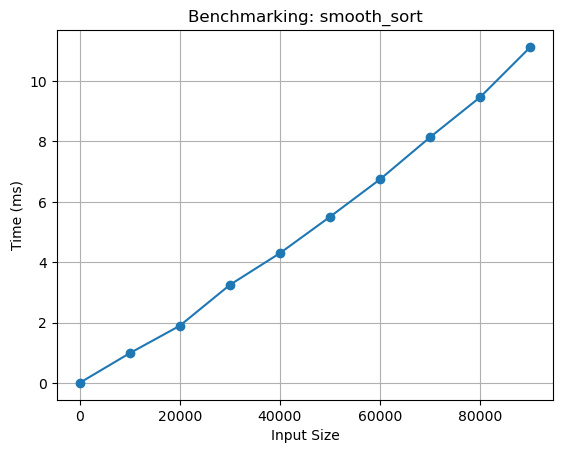

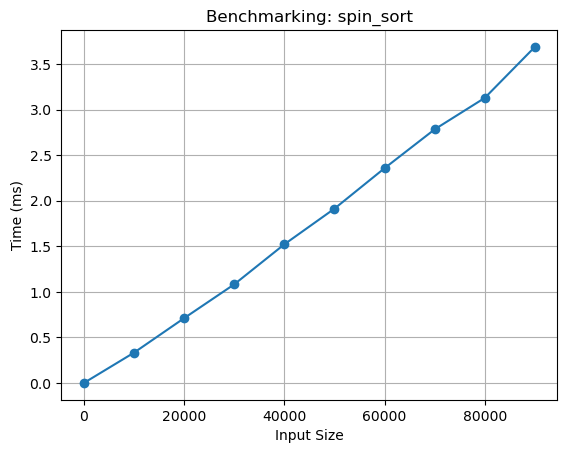

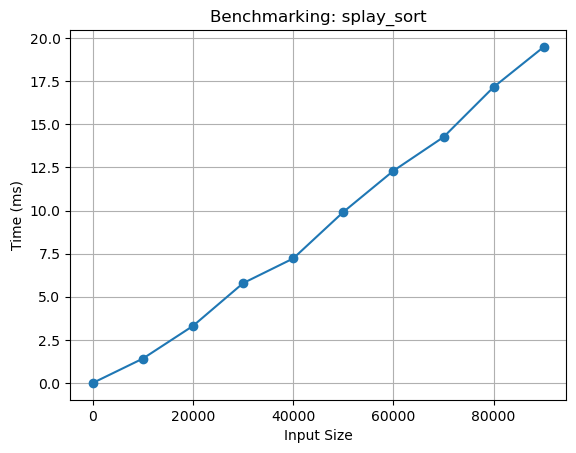

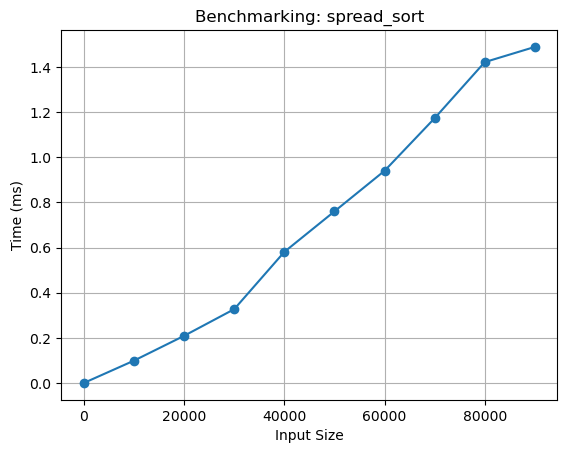

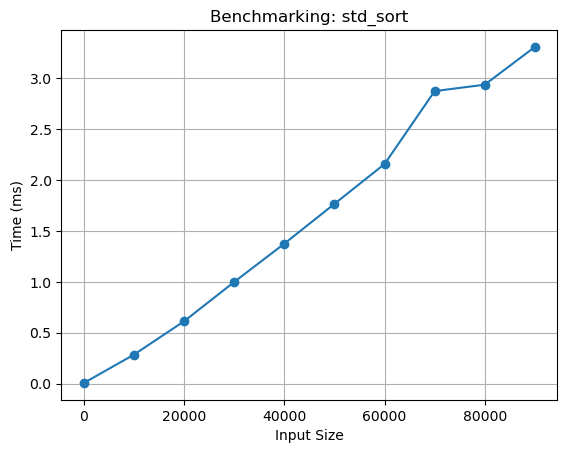

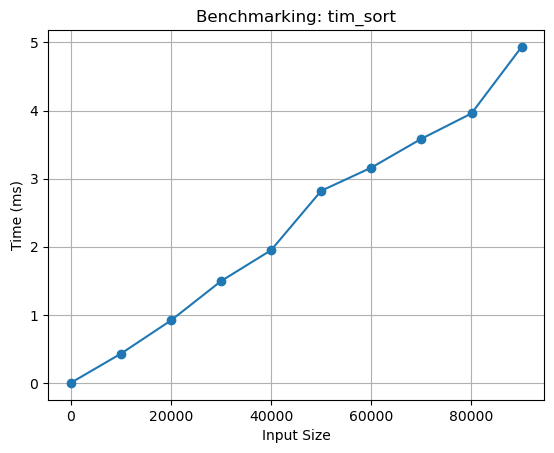

adaptive_shivers_sort: 2.3802 ms
cartesian_tree_sort: 3.0638 ms
counting_sort: 0.0949 ms
heap_sort: 1.3930 ms
insertion_sort: 193.7114 ms
mel_sort: 3.5528 ms
merge_sort: 1.6088 ms
poplar_sort: 2.4694 ms
quick_sort: 1.7236 ms
quick_merge_sort: 1.8892 ms
ska_sort: 0.4578 ms
slab_sort: 7.5531 ms
smooth_sort: 5.1432 ms
spin_sort: 1.7516 ms
splay_sort: 9.0847 ms
spread_sort: 0.7003 ms
std_sort: 1.6329 ms
tim_sort: 2.3250 ms


In [6]:
import matplotlib.pyplot as plt

for sort_name, sort_times in zip(sorts, times):
    plt.figure()  
    plt.plot(sizes, sort_times, marker='o')
    plt.xlabel("Input Size")
    plt.ylabel("Time (ms)")
    plt.title(f"Benchmarking: {sort_name}")
    plt.grid(True)
    plt.show()

for i in range(len(sorts)):
    print(f"{sorts[i]}: {np.mean(times[i]):.4f} ms")

In [7]:
import time

def benchmark_python_sort(arrays):
    total_time = 0.0
    for arr in arrays:
        arr_copy = arr.copy()

        start = time.perf_counter()
        arr_copy.sort()
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000

python_sort_time = benchmark_python_sort(dataset)
print(f"Python default sort benchmark: {python_sort_time:.4f} ms")

Python default sort benchmark: 47.2645 ms


In [8]:
def benchmark_numpy_sort_kind(arrays, kind='quicksort'):
    total_time = 0.0
    for arr in arrays:
        np_arr = np.array(arr)

        start = time.perf_counter()
        np.sort(np_arr, kind=kind)
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000  

kinds = ['quicksort', 'mergesort', 'heapsort', 'stable']

for kind in kinds:
    sort_time = benchmark_numpy_sort_kind(dataset, kind=kind)
    print(f"NumPy sort ({kind}): {sort_time:.4f} ms")

NumPy sort (quicksort): 17.9630 ms
NumPy sort (mergesort): 16.0624 ms
NumPy sort (heapsort): 13.3002 ms
NumPy sort (stable): 17.0619 ms
